In [84]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt
import seaborn as sns
from scipy import stats

In [85]:
df = pd.read_csv("data.csv")

In [86]:
df

Unnamed: 0      ID     Salary           DOJ           DOL  \
0         train  203097   420000.0   6/1/12 0:00       present   
1         train  579905   500000.0   9/1/13 0:00       present   
2         train  810601   325000.0   6/1/14 0:00       present   
3         train  267447  1100000.0   7/1/11 0:00       present   
4         train  343523   200000.0   3/1/14 0:00   3/1/15 0:00   
...         ...     ...        ...           ...           ...   
3993      train   47916   280000.0  10/1/11 0:00  10/1/12 0:00   
3994      train  752781   100000.0   7/1/13 0:00   7/1/13 0:00   
3995      train  355888   320000.0   7/1/13 0:00       present   
3996      train  947111   200000.0   7/1/14 0:00   1/1/15 0:00   
3997      train  324966   400000.0   2/1/13 0:00       present   

                      Designation           JobCity Gender           DOB  \
0         senior quality engineer         Bangalore      f  2/19/90 0:00   
1               assistant manager            Indore      m  10/4/89 0:00   
2                systems engineer           Chennai      f   8/3/92 0:00   
3        senior software engineer           Gurgaon      m  12/5/89 0:00   
4                             get           Manesar      m  2/27/91 0:00   
...                           ...               ...    ...           ...   
3993            software engineer        New Delhi       m  4/15/87 0:00   
3994             technical writer         Hyderabad      f  8/27/92 0:00   
3995  associate software engineer         Bangalore      m   7/3/91 0:00   
3996           software developer  Asifabadbanglore      f  3/20/92 0:00   
3997      senior systems engineer           Chennai      f  2/26/91 0:00   

      10percentage  ... ComputerScience  MechanicalEngg  ElectricalEngg  \
0            84.30  ...              -1              -1              -1   
1            85.40  ...              -1              -1              -1   
2            85.00  ...              -1              -1              -1   
3            85.60  ...              -1              -1              -1   
4            78.00  ...              -1              -1              -1   
...            ...  ...             ...             ...             ...   
3993         52.09  ...              -1              -1              -1   
3994         90.00  ...              -1              -1              -1   
3995         81.86  ...              -1              -1              -1   
3996         78.72  ...             438              -1              -1   
3997         70.60  ...              -1              -1              -1   

     TelecomEngg  CivilEngg  conscientiousness agreeableness extraversion  \
0             -1         -1             0.9737        0.8128       0.5269   
1             -1         -1            -0.7335        0.3789       1.2396   
2             -1         -1             0.2718        1.7109       0.1637   
3             -1         -1             0.0464        0.3448      -0.3440   
4             -1         -1            -0.8810       -0.2793      -1.0697   
...          ...        ...                ...           ...          ...   
3993          -1         -1            -0.1082        0.3448       0.2366   
3994          -1         -1            -0.3027        0.8784       0.9322   
3995          -1         -1            -1.5765       -1.5273      -1.5051   
3996          -1         -1            -0.1590        0.0459      -0.4511   
3997          -1         -1            -1.1128       -0.2793      -0.6343   

      nueroticism  openess_to_experience  
0         1.35490                -0.4455  
1        -0.10760                 0.8637  
2        -0.86820                 0.6721  
3        -0.40780                -0.9194  
4         0.09163                -0.1295  
...           ...                    ...  
3993      0.64980                -0.9194  
3994      0.77980                -0.0943  
3995     -1.31840                -0.7615  
3996     -0.36120                -0.0943  


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [107]:
for i in df.columns:
    if pd.api.types.is_numeric_dtype(i):
    # Calculate IQR (Interquartile Range)
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1

    # Identify outliers based on 1.5 * IQR rule
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = i[(i < lower_bound) | (i > upper_bound)]

    # Print results
        print(f"Column: {i.name}")
        print(f"Number of outliers: {len(outliers)}")
        if len(outliers) > 0:
            print(f"Sample outliers: {outliers.head()}")
        else:
            print(f"Column: {i.name}")
            print("Not a numerical column, outliers cannot be checked.")


In [ ]:
 if pd.api.types.is_numeric_dtype('Salary'):
    # Calculate IQR (Interquartile Range)
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1

    # Identify outliers based on 1.5 * IQR rule
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = i[(i < lower_bound) | (i > upper_bound)]

    # Print results
        print(f"Column: {i.name}")
        print(f"Number of outliers: {len(outliers)}")
        if len(outliers) > 0:
            print(f"Sample outliers: {outliers.head()}")
        else:
            print(f"Column: {i.name}")
            print("Not a numerical column, outliers cannot be checked.")

## Let's get in to Univaraite Analysis

In [89]:
# Summary statistics for continuous variables
print("\nSummary Statistics for Continuous Variables:")
print(df.describe())


Summary Statistics for Continuous Variables:
                 ID        Salary  10percentage  12graduation  12percentage  \
count  3.998000e+03  3.998000e+03   3998.000000   3998.000000   3998.000000   
mean   6.637945e+05  3.076998e+05     77.925443   2008.087544     74.466366   
std    3.632182e+05  2.127375e+05      9.850162      1.653599     10.999933   
min    1.124400e+04  3.500000e+04     43.000000   1995.000000     40.000000   
25%    3.342842e+05  1.800000e+05     71.680000   2007.000000     66.000000   
50%    6.396000e+05  3.000000e+05     79.150000   2008.000000     74.400000   
75%    9.904800e+05  3.700000e+05     85.670000   2009.000000     82.600000   
max    1.298275e+06  4.000000e+06     97.760000   2013.000000     98.700000   

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
mean    5156.851426     1.925713    71.486171    5156.851426         0.300400   

In [90]:
# Frequency distribution for categorical variables
categorical_vars = ['Designation', 'JobCity', 'Gender', '10board', '12board', 'CollegeTier', 'Degree', 'Specialization', 'CollegeCityTier', 'CollegeState']
for i in categorical_vars:
    print("\nFrequency Distribution for", i)
    print(df[i].value_counts())


Frequency Distribution for Designation
software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: Designation, Length: 419, dtype: int64

Frequency Distribution for JobCity
Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: JobCity, Length: 339, dtype: int64

Frequency Distribution for Gender
m    3041
f     957
Name: Gender, dtype: int64

Frequency Distribution for 10board
cbse 

In [91]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversio

### Since there are no null values in the given data then there no need to clean the given dataset

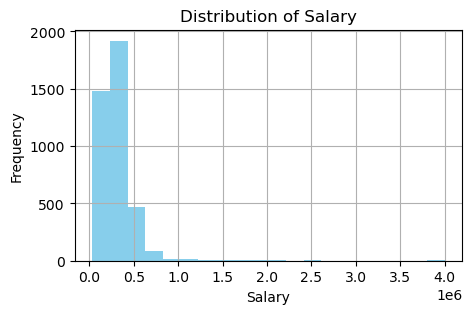

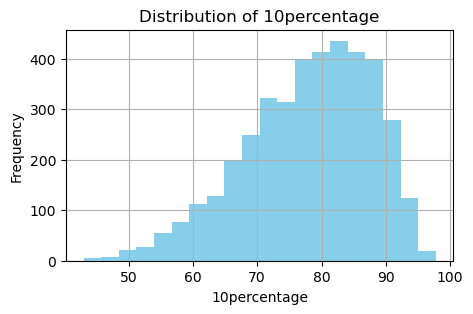

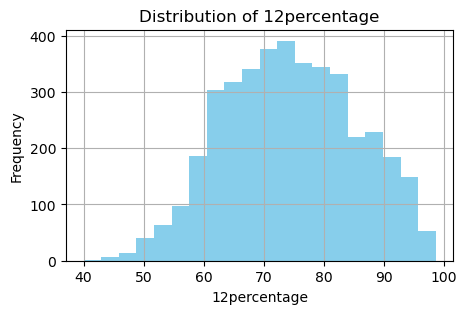

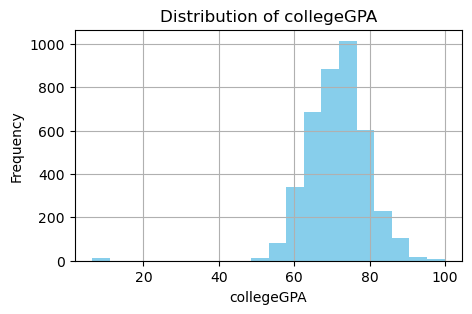

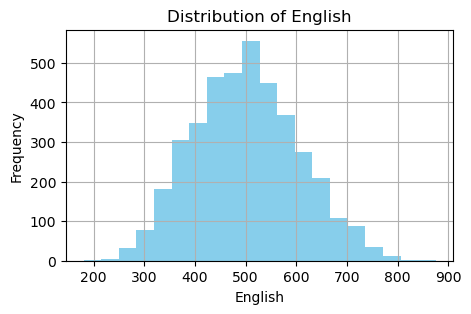

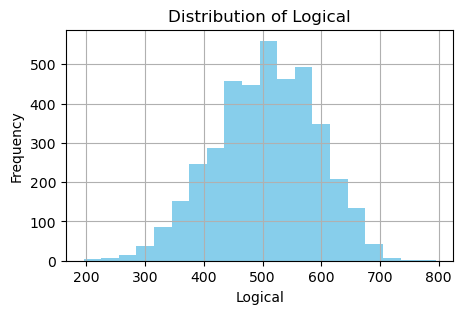

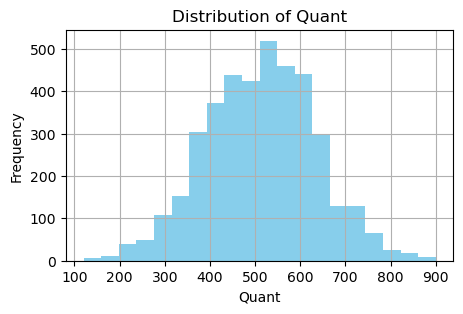

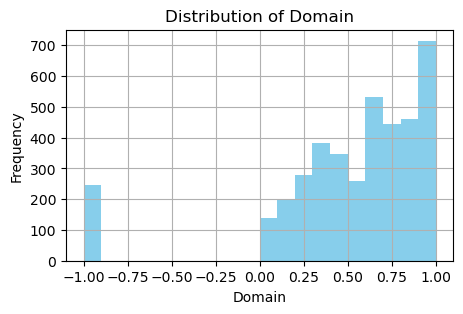

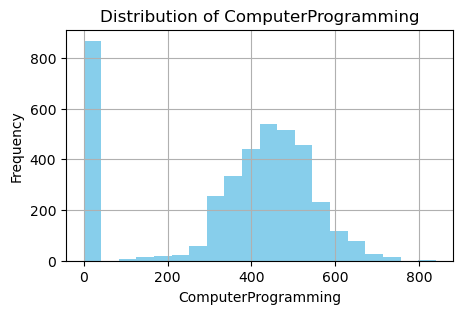

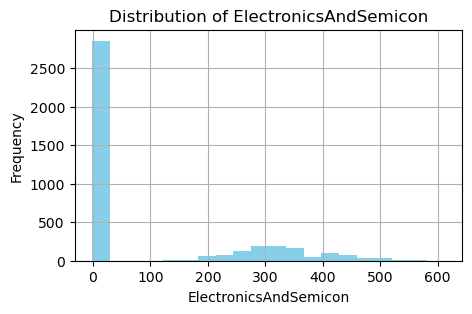

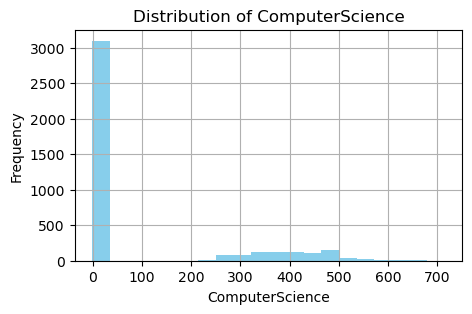

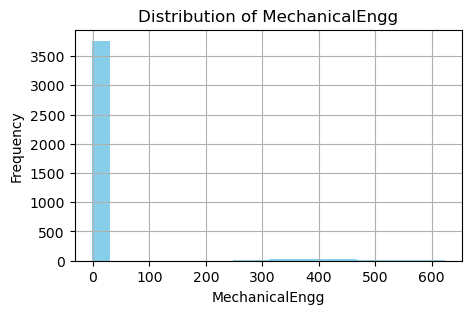

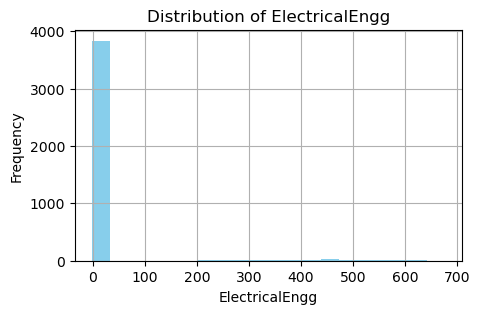

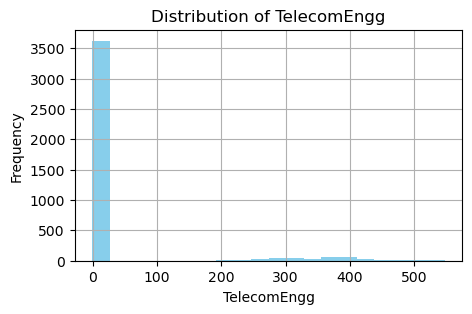

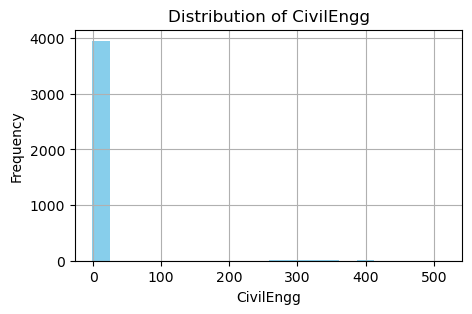

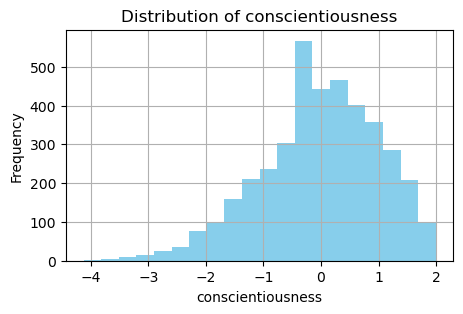

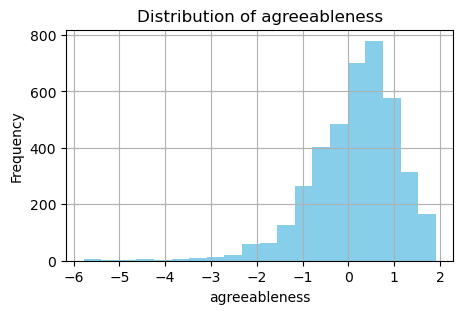

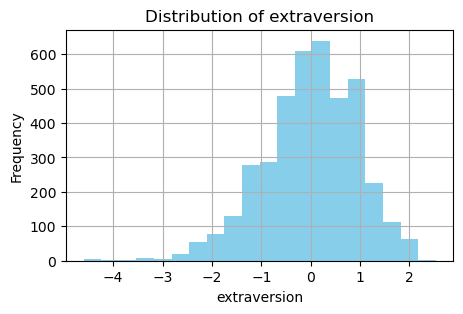

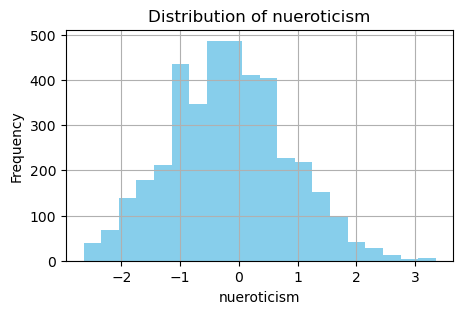

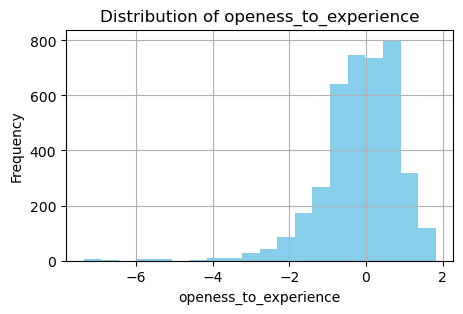

In [120]:
continuous_vars = ['Salary', '10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']
for i in continuous_vars:
    plt.figure(figsize=(5, 3))
    plt.hist(df[i], bins=20, color='skyblue')
    plt.title('Distribution of ' + i)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


### Let's dive into Bi-varaite Analysis

In [93]:
# Correlation analysis for continuous variables
continuous_vars = ['Salary', '10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']
corr_matrix = df[continuous_vars].corr()

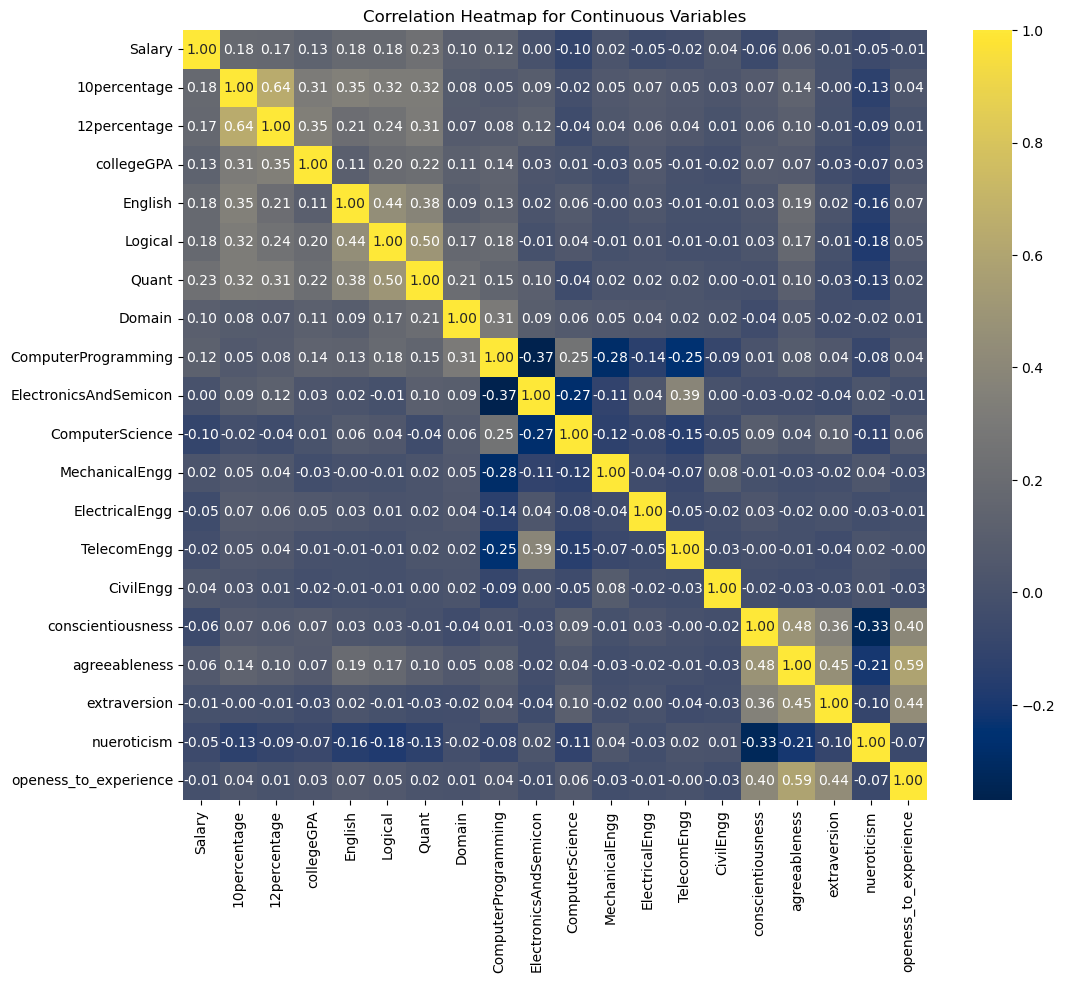

In [94]:
# Plotting heatmap for correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='cividis', fmt=".2f")
plt.title('Correlation Heatmap for Continuous Variables')
plt.show()

Designation has too many unique values to visualize in a cross-tabulation.
JobCity has too many unique values to visualize in a cross-tabulation.


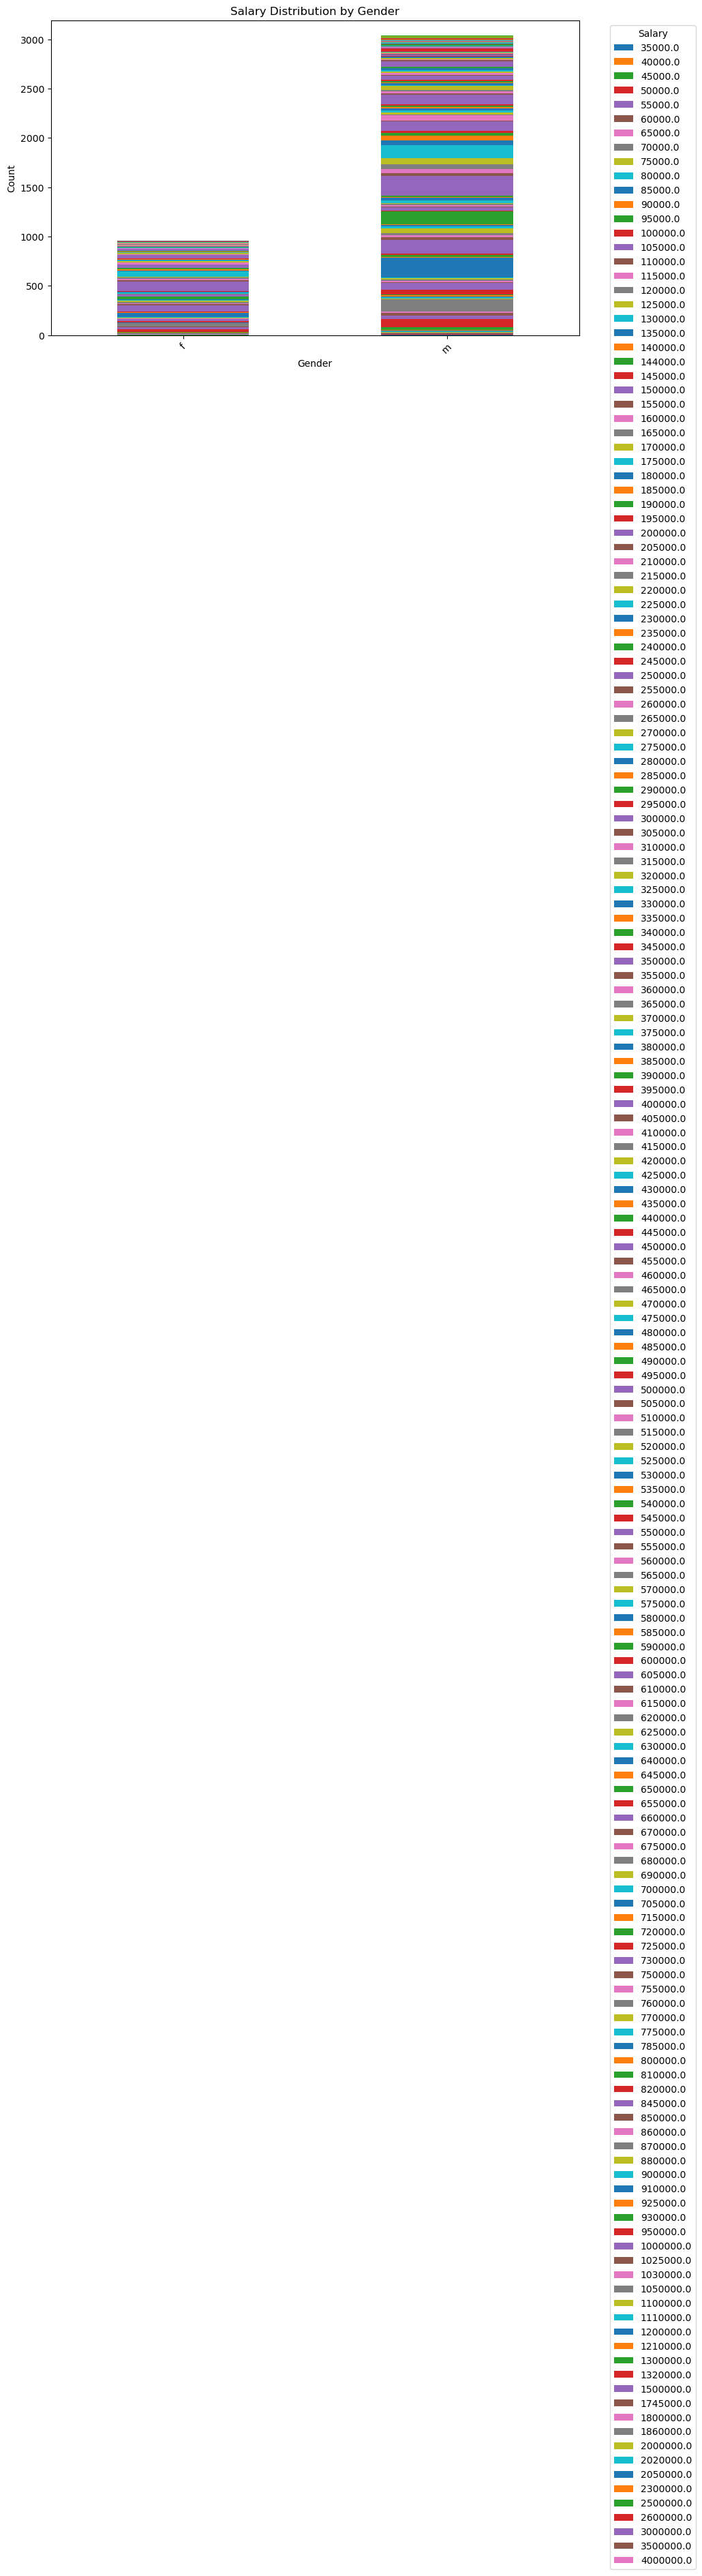

10board has too many unique values to visualize in a cross-tabulation.
12board has too many unique values to visualize in a cross-tabulation.


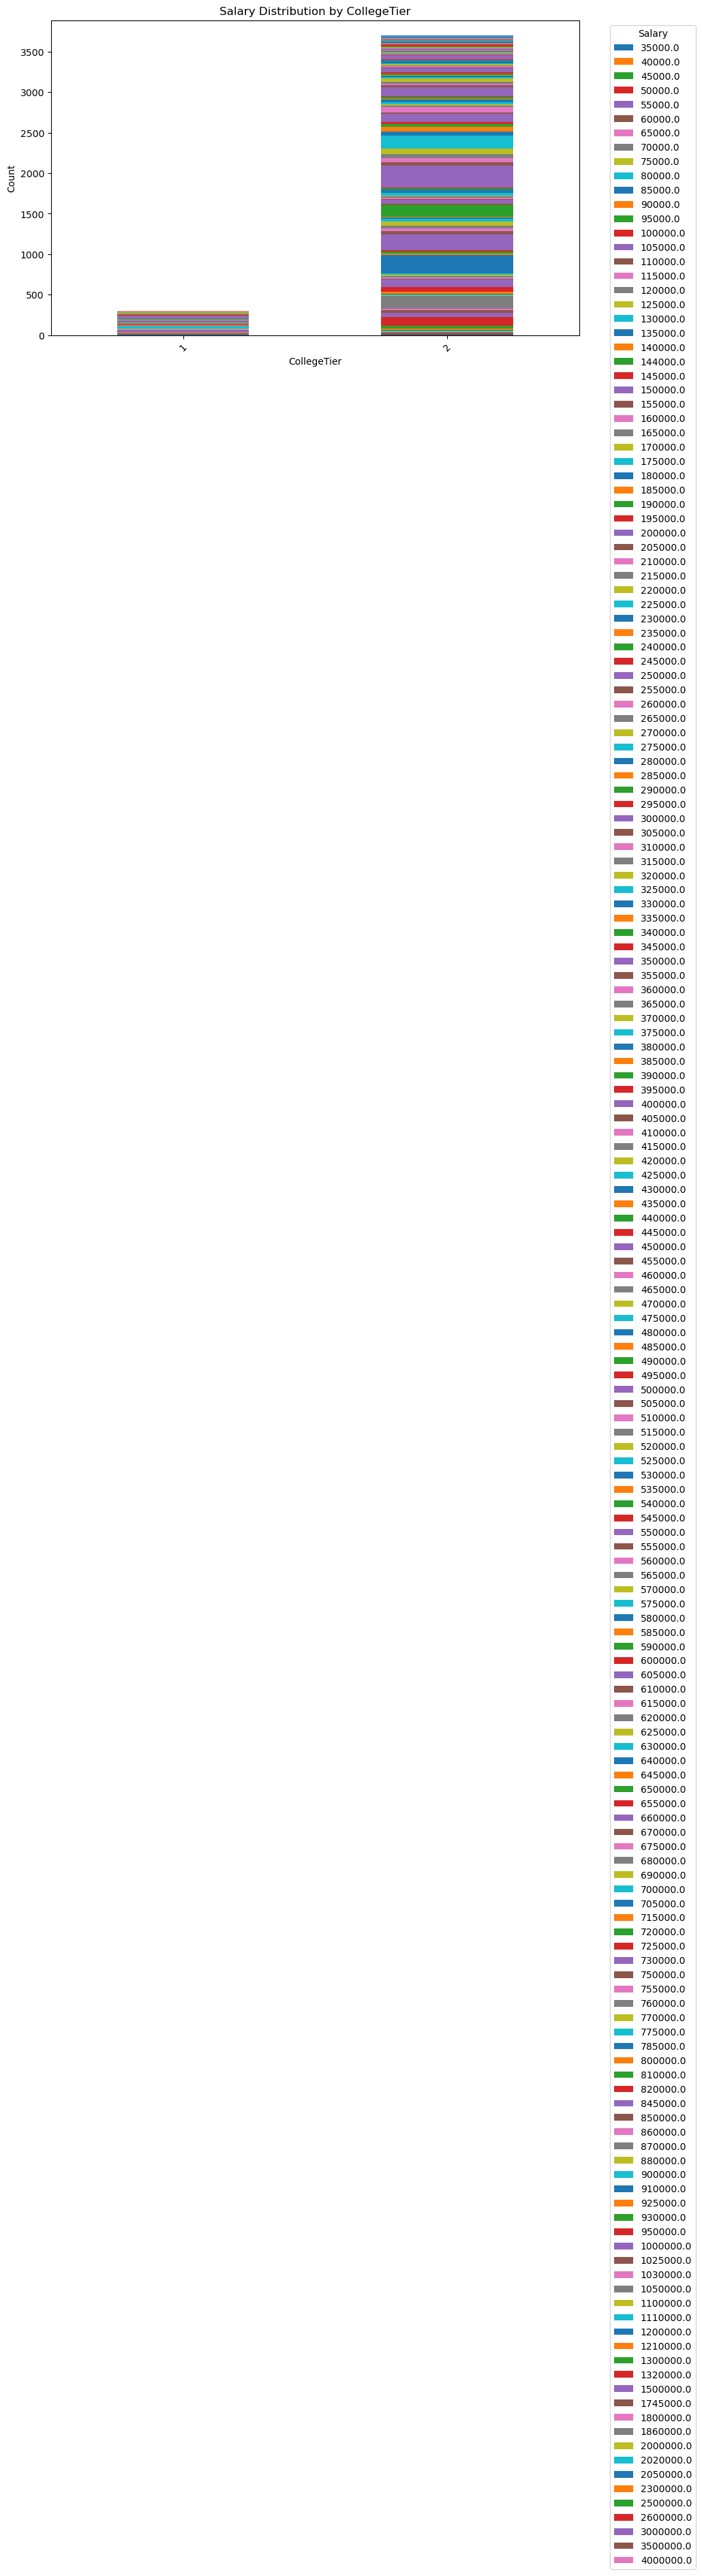

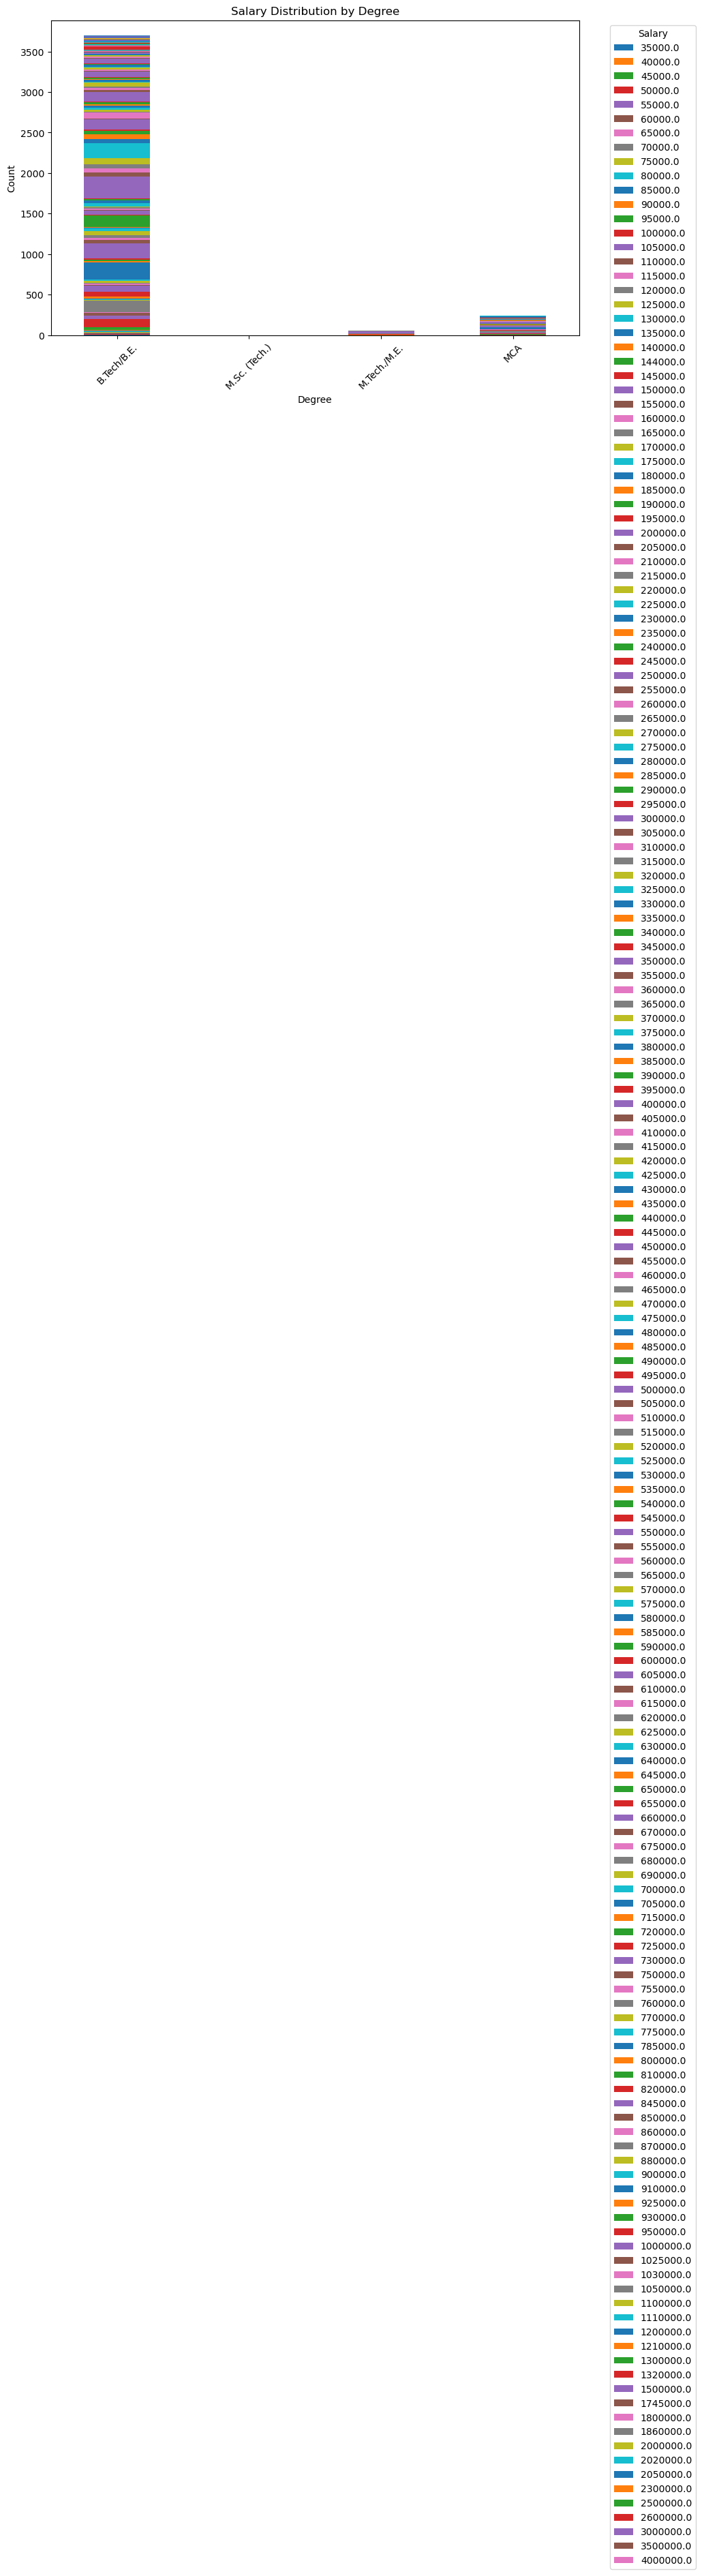

Specialization has too many unique values to visualize in a cross-tabulation.


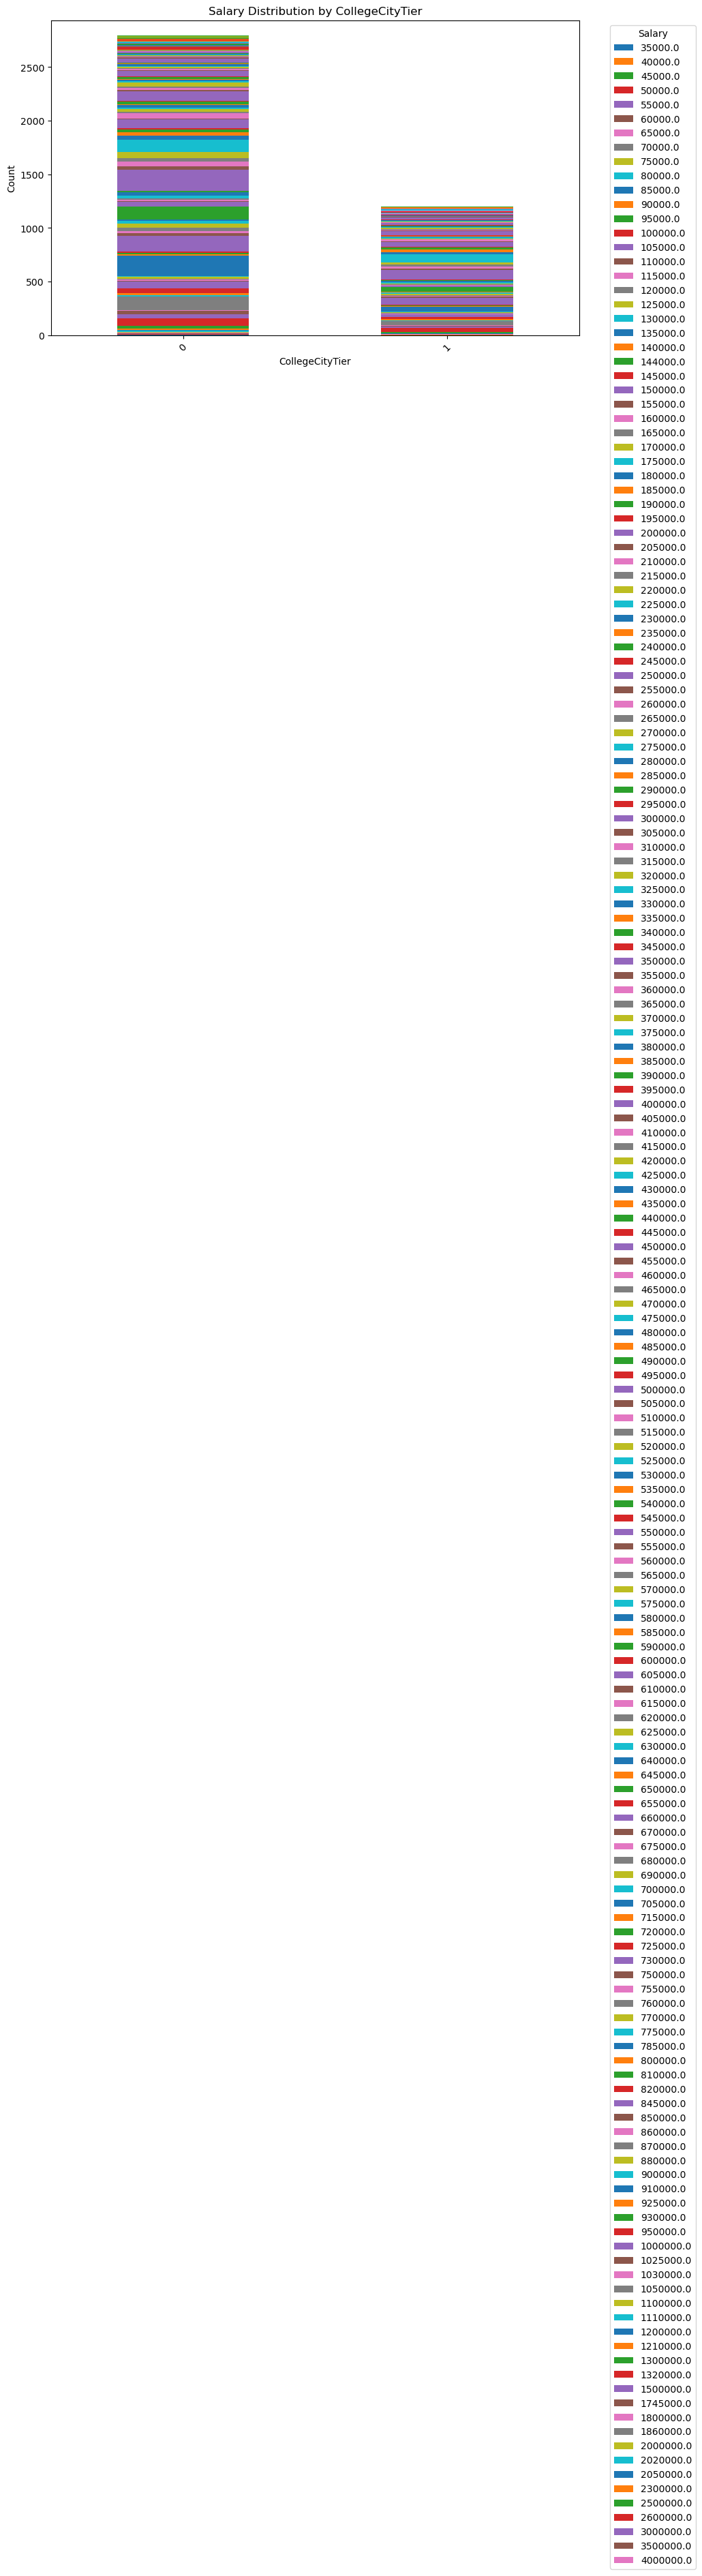

CollegeState has too many unique values to visualize in a cross-tabulation.


In [95]:
# Bivariate analysis for categorical variables
categorical_vars = ['Designation', 'JobCity', 'Gender', '10board', '12board', 'CollegeTier', 'Degree', 'Specialization', 'CollegeCityTier', 'CollegeState']
for i in categorical_vars:
    if len(df[i].unique()) <= 10:  # considering variables with less than or equal to 10 unique values
        # Creating cross-tabulation
        cross_tab = pd.crosstab(index=df[i], columns=df['Salary'])
        cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
        plt.title('Salary Distribution by ' + i)
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        #plt.legend(title='Salary')
        plt.legend(title='Salary', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()
        print('=================================================================================================================')
    else:
        print(f"{i} has too many unique values to visualize in a cross-tabulation.")

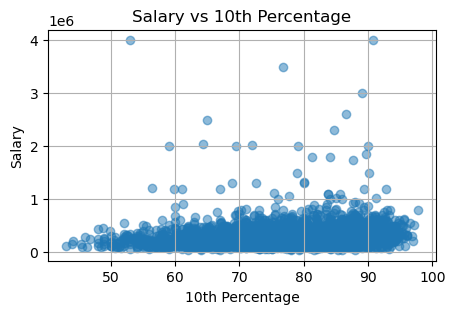

In [121]:
# Scatter plot for bivariate analysis between two continuous variables
plt.figure(figsize=(5, 3))
plt.scatter(df['10percentage'], df['Salary'], alpha=0.5)
plt.title('Salary vs 10th Percentage')
plt.xlabel('10th Percentage')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

## What is the highest salary of employees who left the company and his experience

In [122]:
left_emp_df = df[df["DOL"] != "present"]

left_emp_df

Unnamed: 0      ID    Salary           DOJ           DOL  \
4         train  343523  200000.0   3/1/14 0:00   3/1/15 0:00   
6         train  947847  300000.0   8/1/14 0:00   5/1/15 0:00   
7         train  912934  400000.0   7/1/14 0:00   7/1/15 0:00   
10        train   87291  600000.0   4/1/11 0:00   4/1/15 0:00   
11        train  190393  450000.0   8/1/11 0:00  10/1/14 0:00   
...         ...     ...       ...           ...           ...   
3991      train  230873  630000.0   7/1/11 0:00  10/1/14 0:00   
3992      train  344407  800000.0   4/1/14 0:00   4/1/15 0:00   
3993      train   47916  280000.0  10/1/11 0:00  10/1/12 0:00   
3994      train  752781  100000.0   7/1/13 0:00   7/1/13 0:00   
3996      train  947111  200000.0   7/1/14 0:00   1/1/15 0:00   

                  Designation           JobCity Gender           DOB  \
4                         get           Manesar      m  2/27/91 0:00   
6      java software engineer          Banglore      m   2/1/93 0:00   
7         mechanical engineer         Bangalore      m  5/27/92 0:00   
10       senior php developer         Bangalore      m  6/24/89 0:00   
11    senior systems engineer              Pune      m  2/10/90 0:00   
...                       ...               ...    ...           ...   
3991          systems analyst         Bangalore      m  5/20/90 0:00   
3992                  manager            Rajkot      m  6/22/90 0:00   
3993        software engineer        New Delhi       m  4/15/87 0:00   
3994         technical writer         Hyderabad      f  8/27/92 0:00   
3996       software developer  Asifabadbanglore      f  3/20/92 0:00   

      10percentage  ... ComputerScience  MechanicalEngg  ElectricalEngg  \
4            78.00  ...              -1              -1              -1   
6            86.08  ...             346              -1              -1   
7            92.00  ...              -1             469              -1   
10           88.60  ...              -1              -1              -1   
11           81.00  ...              -1              -1              -1   
...            ...  ...             ...             ...             ...   
3991         80.00  ...              -1              -1              -1   
3992         73.00  ...              -1              -1              -1   
3993         52.09  ...              -1              -1              -1   
3994         90.00  ...              -1              -1              -1   
3996         78.72  ...             438              -1              -1   

     TelecomEngg  CivilEngg  conscientiousness agreeableness extraversion  \
4             -1         -1            -0.8810       -0.2793      -1.0697   
6             -1         -1             1.7081       -0.1054      -1.0379   
7             -1         -1            -0.0154        1.2114       0.0100   
10            -1         -1             0.0464        0.8128       0.0914   
11            -1         -1            -2.2720        1.1248       0.8171   
...          ...        ...                ...           ...          ...   
3991         393         -1            -1.3447        0.5008      -1.6502   
3992          -1        480             0.3555       -0.9033       0.9623   
3993          -1         -1            -0.1082        0.3448       0.2366   
3994          -1         -1            -0.3027        0.8784       0.9322   
3996          -1         -1            -0.1590        0.0459      -0.4511   

      nueroticism  openess_to_experience  
4         0.09163                -0.1295  
6        -2.00920                -1.0872  
7         0.14590                 1.2470  
10        0.17980                 0.0284  
11       -0.40780                -0.4455  
...           ...                    ...  
3991     -0.05520                 0.0284  
3992      0.64983                -0.4229  
3993      0.64980                -0.9194  
3994      0.77980                -0.0943  
3996     -0.36120                -0.0943  

[2123 rows x 39 

In [123]:
left_emp_df["DOJ"] = pd.to_datetime(left_emp_df["DOJ"])
left_emp_df["DOL"] = pd.to_datetime(left_emp_df["DOL"])

C:\Users\AKHIL\AppData\Local\Temp\ipykernel_20212\416564450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_emp_df["DOJ"] = pd.to_datetime(left_emp_df["DOJ"])
C:\Users\AKHIL\AppData\Local\Temp\ipykernel_20212\416564450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_emp_df["DOL"] = pd.to_datetime(left_emp_df["DOL"])


In [124]:
left_emp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2123 entries, 4 to 3996
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             2123 non-null   object        
 1   ID                     2123 non-null   int64         
 2   Salary                 2123 non-null   float64       
 3   DOJ                    2123 non-null   datetime64[ns]
 4   DOL                    2123 non-null   datetime64[ns]
 5   Designation            2123 non-null   object        
 6   JobCity                2123 non-null   object        
 7   Gender                 2123 non-null   object        
 8   DOB                    2123 non-null   object        
 9   10percentage           2123 non-null   float64       
 10  10board                2123 non-null   object        
 11  12graduation           2123 non-null   int64         
 12  12percentage           2123 non-null   float64       
 13  12b

In [125]:
left_emp_df["working_days"] = left_emp_df["DOL"] - left_emp_df["DOJ"]

left_emp_df

C:\Users\AKHIL\AppData\Local\Temp\ipykernel_20212\1142178114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_emp_df["working_days"] = left_emp_df["DOL"] - left_emp_df["DOJ"]


Unnamed: 0      ID    Salary        DOJ        DOL  \
4         train  343523  200000.0 2014-03-01 2015-03-01   
6         train  947847  300000.0 2014-08-01 2015-05-01   
7         train  912934  400000.0 2014-07-01 2015-07-01   
10        train   87291  600000.0 2011-04-01 2015-04-01   
11        train  190393  450000.0 2011-08-01 2014-10-01   
...         ...     ...       ...        ...        ...   
3991      train  230873  630000.0 2011-07-01 2014-10-01   
3992      train  344407  800000.0 2014-04-01 2015-04-01   
3993      train   47916  280000.0 2011-10-01 2012-10-01   
3994      train  752781  100000.0 2013-07-01 2013-07-01   
3996      train  947111  200000.0 2014-07-01 2015-01-01   

                  Designation           JobCity Gender           DOB  \
4                         get           Manesar      m  2/27/91 0:00   
6      java software engineer          Banglore      m   2/1/93 0:00   
7         mechanical engineer         Bangalore      m  5/27/92 0:00   
10       senior php developer         Bangalore      m  6/24/89 0:00   
11    senior systems engineer              Pune      m  2/10/90 0:00   
...                       ...               ...    ...           ...   
3991          systems analyst         Bangalore      m  5/20/90 0:00   
3992                  manager            Rajkot      m  6/22/90 0:00   
3993        software engineer        New Delhi       m  4/15/87 0:00   
3994         technical writer         Hyderabad      f  8/27/92 0:00   
3996       software developer  Asifabadbanglore      f  3/20/92 0:00   

      10percentage  ... MechanicalEngg  ElectricalEngg  TelecomEngg CivilEngg  \
4            78.00  ...             -1              -1           -1        -1   
6            86.08  ...             -1              -1           -1        -1   
7            92.00  ...            469              -1           -1        -1   
10           88.60  ...             -1              -1           -1        -1   
11           81.00  ...             -1              -1           -1        -1   
...            ...  ...            ...             ...          ...       ...   
3991         80.00  ...             -1              -1          393        -1   
3992         73.00  ...             -1              -1           -1       480   
3993         52.09  ...             -1              -1           -1        -1   
3994         90.00  ...             -1              -1           -1        -1   
3996         78.72  ...             -1              -1           -1        -1   

      conscientiousness  agreeableness extraversion nueroticism  \
4               -0.8810        -0.2793      -1.0697     0.09163   
6                1.7081        -0.1054      -1.0379    -2.00920   
7               -0.0154         1.2114       0.0100     0.14590   
10               0.0464         0.8128       0.0914     0.17980   
11              -2.2720         1.1248       0.8171    -0.40780   
...                 ...            ...          ...         ...   
3991            -1.3447         0.5008      -1.6502    -0.05520   
3992             0.3555        -0.9033       0.9623     0.64983   
3993            -0.1082         0.3448       0.2366     0.64980   
3994            -0.3027         0.8784       0.9322     0.77980   
3996            -0.1590         0.0459      -0.4511    -0.36120   

      openess_to_experience  working_days  
4                   -0.1295      365 days  
6                   -1.0872      273 days  
7                    1.2470      365 days  
10                   0.0284     1461 days  
11                  -0.4455     1157 days  
...                     ...           ...  
3991                 0.0284     1188 days  
3992                -0.4229      365 days  
3993                -0.9194      366 days  
3994                -0.0943        0 days  
3996                -0.0943      184 days  

[2123 rows x 40 columns]

In [126]:
max_salary = left_emp_df["Salary"].max()

max_salary

4000000.0

### Ans: max salary  in employees left ---> 4000000.0

In [ ]:
experience_of_high_sal=df[df['Salary']==4000000.0]

In [ ]:
emp_exp=experience_of_high_sal['openess_to_experience'].tolist()

In [ ]:
emp_exp

### ANS: experience level of employees who has high salry and left the company : -0.1295, -2.6572 

## Count of employees still working and the no of employees having salary greater than average salary

In [127]:
present_emp = df[df['DOL'] == "present"].value_counts()

len(present_emp)

1875

## Avg salary employees who are still working

In [ ]:
present_employs = df[df['DOL'] == "present"]

present_employs

In [ ]:
avg_salary = present_employs["Salary"].mean()

avg_salary

### Ans: 345588.8

In [ ]:
gt_than_avgsal = df[(df['DOL'] == "present") & (df["Salary"] > df['Salary'].mean())].value_counts()

len(gt_than_avgsal)

### Ans: count of all ---> 1875 and greater than average salary  ---> 1095

##  Plot an effective graph on the score in selection test and the salary greater than the average salary of an employee

In [ ]:
grt_sal=df[(df['DOL'] == "present") & (df["Salary"] > df['Salary'].mean())]

In [ ]:
grt_sal

In [ ]:
grt_sal.info()

In [ ]:


plt.figure(figsize=(10, 6))
sns.boxplot(data=grt_sal, x=grt_sal['Salary'], y=grt_sal['openess_to_experience'], palette='husl')
plt.xlabel('Salary')
plt.ylabel('Selection score')
plt.title('employees who are having good salary and their selection score')
plt.legend(labels=['Selection Scores of Employees with Good Salary'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Comparing men average salary and women salary

In [ ]:
male_df = df[df["Gender"] == "m"]

female_df = df[df["Gender"] == "f"]

In [ ]:
male_df

In [ ]:
male_df["Salary"].mean()

In [ ]:
female_df

In [ ]:
female_df["Salary"].mean()

### Ans: avg salary male = 311716.21177244326, female = 294937.3040752351

## Find the count of  women who left the company and not left the company and for every thing find salary greater than average salary

In [ ]:
left_emp_df

In [ ]:
len(left_emp_df[left_emp_df["Gender"] == "f"].value_counts())

In [ ]:
len(left_emp_df[(left_emp_df["Gender"] == "f") & (left_emp_df["Salary"] > left_emp_df['Salary'].mean())].value_counts())

In [ ]:
len(present_employs[present_employs["Gender"] == "f"].value_counts())

In [ ]:
len(present_employs[(present_employs["Gender"] == "f") & (present_employs["Salary"] >present_employs['Salary'].mean())].value_counts())

### Ans: left ---> women: 509 ; present ---> women: 149

## Filter the df with a particular designation and find the avg Salary

In [ ]:
filtered_df = df[df["Designation"] == 'senior quality engineer']

filtered_df

In [ ]:
filtered_df["Salary"].mean()

### Average salary ofsenior quality engineer : 444000.0

## In which year less number of the employees left the company and what is the highest salary in that year

In [ ]:
left_emp_df['time_column'] = pd.to_datetime(left_emp_df['DOL'], format='%m/%d/%Y %I:%M:%S %p')

left_emp_df

In [ ]:
left_emp_df['year'] = left_emp_df['time_column'].dt.year

left_emp_df

In [ ]:
left_emp_df["year"].unique()

In [ ]:
each_year_counts = left_emp_df['year'].value_counts()

each_year_counts

In [ ]:
each_year_counts.min()

In [ ]:
year = each_year_counts[each_year_counts == each_year_counts.min()].index

year

In [ ]:
in_2005_left_df = left_emp_df[(left_emp_df["year"] == 2005)]

in_2005_left_df["Salary"].max()

In [ ]:
in_2008_left_df = left_emp_df[(left_emp_df["year"] == 2008)]

in_2008_left_df["Salary"].max()

In [ ]:
in_2009_left_df = left_emp_df[(left_emp_df["year"] == 2009)]

in_2009_left_df["Salary"].max()

### (Year,Salary): (2005,180000.0) (2008, 65000.0) (2009,120000.0)

## Let's visualize the above question

In [ ]:
year_counts_sort = each_year_counts.sort_index()

In [ ]:
plt.figure(figsize=(15, 7))
plt.bar(year_counts_sort.index, year_counts_sort.values, color='pink')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Years')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
x = year_counts_sorted.index
y = year_counts_sorted.values

coefficients = np.polyfit(x, y,2)
poly = np.poly1d(coefficients)
x_fit = np.linspace(min(x), max(x),100)
y_fit = poly(x_fit)

plt.figure(figsize=(10, 5))
plt.bar(x, y, color='orange')

plt.plot(x_fit, y_fit, color='grey', linestyle='-', linewidth=2)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Years with Parabolic Fit')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Draw a Boxplot of Salaries by Gender

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Salary', data=df, hue='Gender', palette='Set2')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Box Plot of Openness to Experience by Gender')
plt.yscale('linear')
plt.tight_layout()
plt.show()

#### removing outliers

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Salary', data=df, hue='Gender', palette='Set2', showfliers=False)
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Box Plot of Openness to Experience by Gender (without outliers)')
plt.yscale('linear')
plt.tight_layout()
plt.show()

## Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.



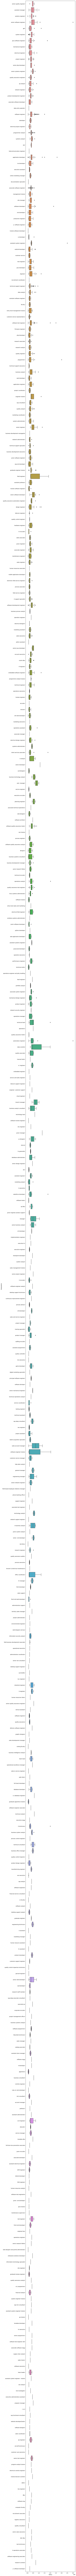

In [111]:
plt.figure(figsize=(8,419))
sns.boxplot(data=df,x='Salary',y='Designation')

plt.show()

In [112]:
len(df['Designation'].unique())

419

In [113]:
prst_emp=df[df['DOL']=='present']
prst_emp

Unnamed: 0       ID     Salary           DOJ      DOL  \
0         train   203097   420000.0   6/1/12 0:00  present   
1         train   579905   500000.0   9/1/13 0:00  present   
2         train   810601   325000.0   6/1/14 0:00  present   
3         train   267447  1100000.0   7/1/11 0:00  present   
5         train  1027655   300000.0   6/1/14 0:00  present   
...         ...      ...        ...           ...      ...   
3987      train   439787   280000.0  11/1/12 0:00  present   
3989      train  1204604   300000.0   9/1/14 0:00  present   
3990      train   204287   480000.0   2/1/12 0:00  present   
3995      train   355888   320000.0   7/1/13 0:00  present   
3997      train   324966   400000.0   2/1/13 0:00  present   

                      Designation    JobCity Gender            DOB  \
0         senior quality engineer  Bangalore      f   2/19/90 0:00   
1               assistant manager     Indore      m   10/4/89 0:00   
2                systems engineer    Chennai      f    8/3/92 0:00   
3        senior software engineer    Gurgaon      m   12/5/89 0:00   
5                 system engineer  Hyderabad      m    7/2/92 0:00   
...                           ...        ...    ...            ...   
3987             network engineer  New Delhi      f   1/16/90 0:00   
3989            software engineer  Bangalore      m  11/23/91 0:00   
3990      senior systems engineer  Hyderabad      f    9/4/89 0:00   
3995  associate software engineer  Bangalore      m    7/3/91 0:00   
3997      senior systems engineer    Chennai      f   2/26/91 0:00   

      10percentage  ... ComputerScience  MechanicalEngg  ElectricalEngg  \
0            84.30  ...              -1              -1              -1   
1            85.40  ...              -1              -1              -1   
2            85.00  ...              -1              -1              -1   
3            85.60  ...              -1              -1              -1   
5            89.92  ...             407              -1              -1   
...            ...  ...             ...             ...             ...   
3987         86.70  ...              -1              -1              -1   
3989         74.88  ...             346              -1              -1   
3990         88.00  ...              -1              -1              -1   
3995         81.86  ...              -1              -1              -1   
3997         70.60  ...              -1              -1              -1   

     TelecomEngg  CivilEngg  conscientiousness agreeableness extraversion  \
0             -1         -1             0.9737        0.8128       0.5269   
1             -1         -1            -0.7335        0.3789       1.2396   
2             -1         -1             0.2718        1.7109       0.1637   
3             -1         -1             0.0464        0.3448      -0.3440   
5             -1         -1            -0.3027       -0.6201      -2.2954   
...          ...        ...                ...           ...          ...   
3987          -1         -1            -1.4992       -1.8393      -0.7794   
3989          -1         -1             0.1282        0.0459       1.2396   
3990         233         -1             0.6646        0.3448       0.3817   
3995          -1         -1            -1.5765       -1.5273      -1.5051   
3997          -1         -1            -1.1128       -0.2793      -0.6343   

      nueroticism  openess_to_experience  
0         1.35490                -0.4455  
1        -0.10760                 0.8637  
2        -0.86820                 0.6721  
3        -0.40780                -0.9194  
5        -0.74150                -0.8608  
...           ...                    ...  
3987      1.47240                -2.3017  
3989      1.03330                 0.6721  
3990     -1.34780                 0.8183  
3995     -1.31840                -0.7615  
3997      1.32553                -0.6035  

[1875 rows x 39 columns]

In [114]:
comptr_s=prst_emp[(prst_emp['ComputerScience']!=-1) & (prst_emp['Designation'].isin(['programming analyst', 'software engineer', 'hardware engineer','associate engineer']))]
comptr_s

Unnamed: 0       ID    Salary          DOJ      DOL        Designation  \
48        train   338428  390000.0  9/1/13 0:00  present  software engineer   
55        train   989860  250000.0  8/1/14 0:00  present  software engineer   
102       train   836781  310000.0  6/1/13 0:00  present  software engineer   
113       train  1087220  340000.0  1/1/15 0:00  present  software engineer   
130       train   902366  325000.0  9/1/14 0:00  present  software engineer   
...         ...      ...       ...          ...      ...                ...   
3940      train  1100767  300000.0  8/1/14 0:00  present  software engineer   
3942      train  1067015  280000.0  7/1/13 0:00  present  software engineer   
3958      train  1039020  310000.0  6/1/14 0:00  present  software engineer   
3981      train  1077872  220000.0  9/1/14 0:00  present  software engineer   
3989      train  1204604  300000.0  9/1/14 0:00  present  software engineer   

            JobCity Gender            DOB  10percentage  ... ComputerScience  \
48        Bangalore      m   2/28/91 0:00         86.60  ...             346   
55        Mangalore      m   2/13/92 0:00         90.80  ...             376   
102            Pune      m  11/26/89 0:00         79.00  ...             346   
113       Hyderabad      m   4/18/91 0:00         91.43  ...             284   
130   Greater Noida      m   1/10/92 0:00         82.80  ...             438   
...             ...    ...            ...           ...  ...             ...   
3940        Chennai      f    8/1/93 0:00         81.00  ...             346   
3942             -1      m   3/17/90 0:00         78.00  ...             346   
3958      Hyderabad      m    9/9/92 0:00         79.90  ...             438   
3981        Gurgaon      m  12/17/91 0:00         53.40  ...             530   
3989      Bangalore      m  11/23/91 0:00         74.88  ...             346   

      MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
48                -1              -1          -1         -1   
55                -1              -1          -1         -1   
102               -1              -1          -1         -1   
113               -1              -1          -1         -1   
130               -1              -1          -1         -1   
...              ...             ...         ...        ...   
3940              -1              -1          -1         -1   
3942              -1              -1          -1         -1   
3958              -1              -1          -1         -1   
3981              -1              -1          -1         -1   
3989              -1              -1          -1         -1   

      conscientiousness agreeableness extraversion  nueroticism  \
48              -2.5039        0.0328       0.3817      0.26793   
55              -0.3027        0.7119      -0.2974      1.16010   
102              1.7081        0.8784       1.5470     -1.62890   
113              0.4155        0.3789      -0.1437     -0.74150   
130             -0.1590        0.0459       0.7785     -1.12180   
...                 ...           ...          ...          ...   
3940             1.1336        0.3789      -0.4511      0.01920   
3942             1.7081       -0.9531       0.1637     -1.62890   
3958            -0.1590        0.5454       0.4711     -0.10760   
3981             0.1282       -0.2871      -0.1437     -1.12180   
3989             0.1282        0.0459       1.2396      1.03330   

      openess_to_experience  
48                   0.5024  
55                  -0.4776  
102                 -0.0943  
113                 -0.2859  
130                 -0.0943  
...                     ...  
3940                 0.6721  
3942                -0.8608  
3958                 0.8637  
3981                 1.4386  
3989                 0.6721  

[92 rows x 39 columns]

In [115]:
comptr_s['Designation'].unique()

array(['software engineer', 'associate engineer'], dtype=object)

<Axes: xlabel='Designation', ylabel='Salary'>

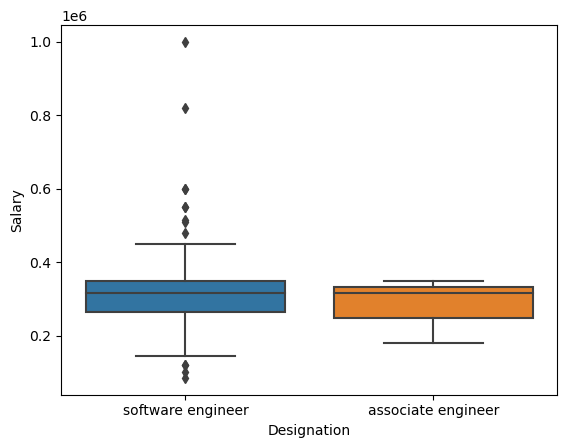

In [116]:
sns.boxplot(data=comptr_s,x='Designation',y='Salary')

In [117]:
Q1 = comptr_s['Salary'].quantile(0.25)
Q3 = comptr_s['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to filter outliers
lower_bound = Q1 - 1.4 * IQR
upper_bound = Q3 + 1.4 * IQR

# Filter out outliers
cleaned_data = comptr_s[(comptr_s['Salary'] > lower_bound) & (df['Salary'] < upper_bound)]


C:\Users\AKHIL\AppData\Local\Temp\ipykernel_20212\2054514223.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_data = comptr_s[(comptr_s['Salary'] > lower_bound) & (df['Salary'] < upper_bound)]


## After Removing Ouliers

<Axes: xlabel='Designation', ylabel='Salary'>

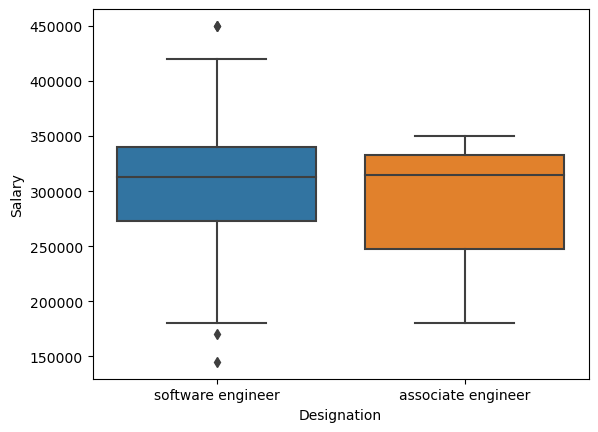

In [118]:
sns.boxplot(data=cleaned_data,x='Designation',y='Salary')

In [119]:
comptr_s['Salary'].mean()

325815.2173913043

## Relation between gender and Specialization

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Specialization', data=df)
plt.title('Count of Category1 by Category2')
plt.xlabel('Category1')
plt.ylabel('Count')
#plt.legend(title='Category2')
plt.legend(title='Specialization', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## year by employment group by gender

In [ ]:
sns.catplot(x='GraduationYear',hue='Gender',data=df,kind='count')
plt.show()

In [ ]:
#df['GraduationYear'].unique()
df['r_sal']=df['Salary']/100000

In [ ]:
print("Program Analyst:" ,round(df['r_sal'][(df['GraduationYear']==2012)&(df['Designation']=='program analyst')],2))